In [1648]:
# Import Dataset 
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset
data = pd.read_excel("Wolf_Hormones.xlsx")
data.shape

(178, 7)

In [1649]:
#Remove duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(178, 7)

In [1650]:
data.head(10)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg,Ppgmg
0,1,M,2,W,15.86,5.32,NaN
1,2,F,1,D,20.02,3.71,14.376220
2,3,F,2,W,9.95,5.30,21.659020
3,4,F,1,D,25.22,3.71,13.425070
4,5,M,2,D,21.13,5.34,NaN
5,6,M,2,W,12.48,4.60,NaN
6,7,M,1,W,26.78,4.58,NaN
7,8,M,1,D,15.41,9.27,NaN
8,9,F,1,D,33.87,4.81,19.912695
9,10,F,2,W,17.29,5.07,34.598060


In [1651]:
#check the decoration
data.columns

Index(['Individual', 'Sex', 'Population', 'Colour', 'Cpgmg', 'Tpgmg', 'Ppgmg'], dtype='object')

## Data Exploration

In [1652]:
# Data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Individual  178 non-null    int64  
 1   Sex         178 non-null    object 
 2   Population  178 non-null    int64  
 3   Colour      178 non-null    object 
 4   Cpgmg       178 non-null    float64
 5   Tpgmg       178 non-null    float64
 6   Ppgmg       69 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


In [1653]:
# Basic data statistics
data.describe()

,Individual,Population,Cpgmg,Tpgmg,Ppgmg
count,178.000000,178.000000,178.000000,178.000000,69.000000
mean,89.500000,1.915730,17.743258,6.147921,25.887460
std,51.528309,0.645436,8.921655,5.035901,8.921180
min,1.000000,1.000000,4.750000,3.140000,12.759095
25%,45.250000,1.250000,12.160000,4.372500,19.498915
50%,89.500000,2.000000,15.605000,5.070000,25.000370
75%,133.750000,2.000000,20.350000,6.317500,30.009250
max,178.000000,3.000000,73.190000,61.790000,53.281910


In [1654]:
# Data statistics for object columns (Text columns)
data.describe(include=object)

,Sex,Colour
count,178,178
unique,3,3
top,M,W
freq,76,111


## Data Cleaning

In [1655]:
# Check for missing values
data.isnull().sum()

Individual      0
Sex             0
Population      0
Colour          0
Cpgmg           0
Tpgmg           0
Ppgmg         109
dtype: int64

In [1656]:
#Ppgmg has null values
# Replace missing values with the mean
data['Ppgmg'].fillna(data['Ppgmg'].mean(), inplace=True)

## Data Visualization

<Axes: xlabel='Sex', ylabel='Ppgmg'>

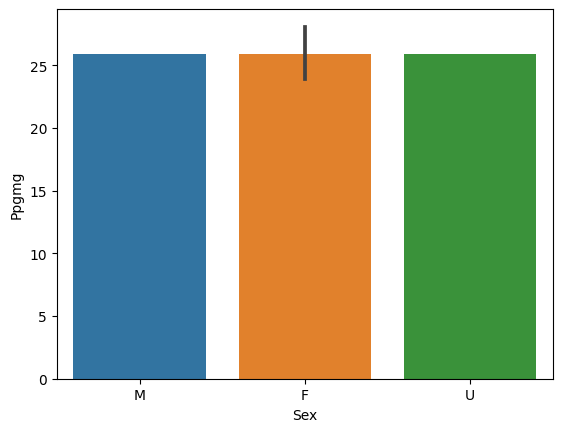

In [1657]:
sns.barplot(x='Sex', y='Ppgmg', data=data)

<Axes: xlabel='Sex', ylabel='Tpgmg'>

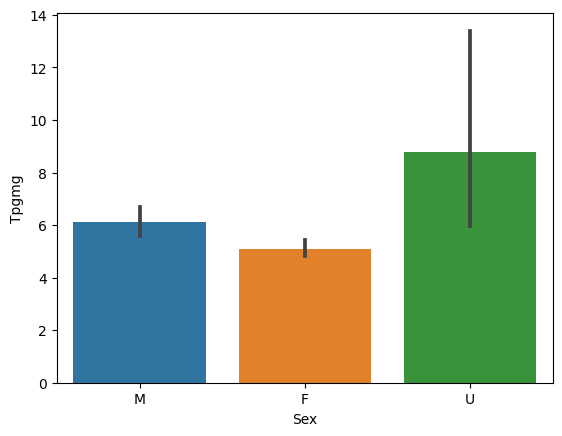

In [1658]:
sns.barplot(x='Sex', y='Tpgmg', data=data)

<Axes: xlabel='Colour', ylabel='Ppgmg'>

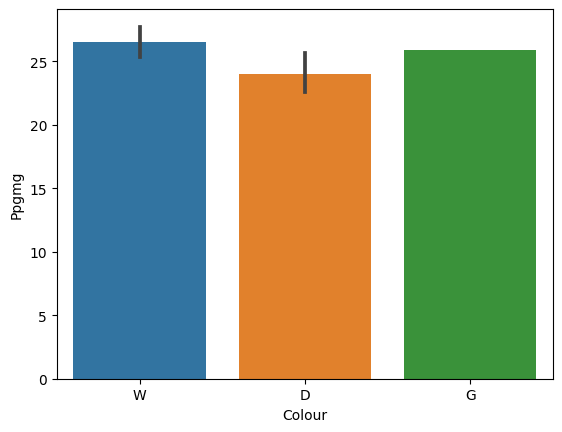

In [1659]:
sns.barplot(x='Colour', y='Ppgmg', data=data)

<Axes: xlabel='Sex', ylabel='Tpgmg'>

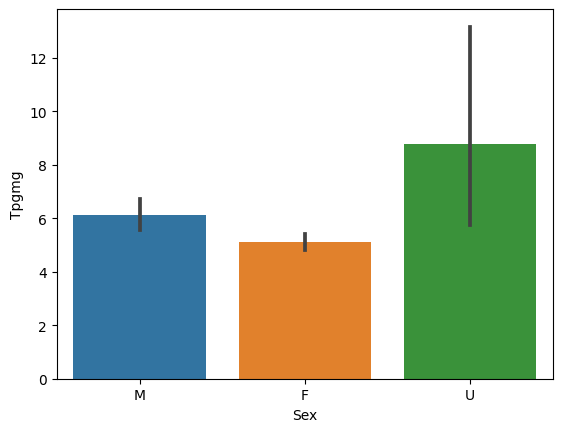

In [1660]:
sns.barplot(x='Sex', y='Tpgmg', data=data)

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Cpgmg'}>]], dtype=object)

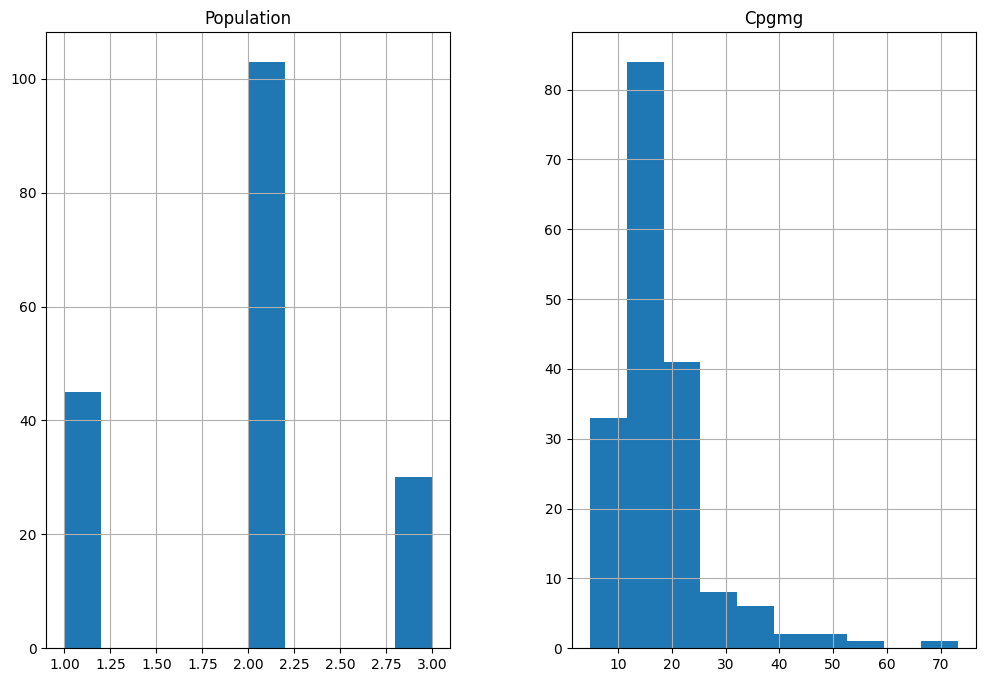

In [1661]:
#sns.histplot(x='Population', data=data)
# Plotting histograms for continuous variables
data.hist(['Population','Cpgmg'], figsize=(12,8))

In [1662]:
# Dealing with outliers
# Finding the nearest logical value to 100 for QRS
data['Cpgmg'][data['Cpgmg']>40].sort_values()

135    40.43
176    43.81
172    49.14
165    50.31
163    54.47
173    73.19
Name: Cpgmg, dtype: float64

In [1663]:
# Replace the values greater than 40 with 40
data['Cpgmg'][data['Cpgmg']>40] = 40

C:\Users\user\AppData\Local\Temp\ipykernel_19532\477935599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cpgmg'][data['Cpgmg']>40] = 40


<Axes: xlabel='Cpgmg', ylabel='Count'>

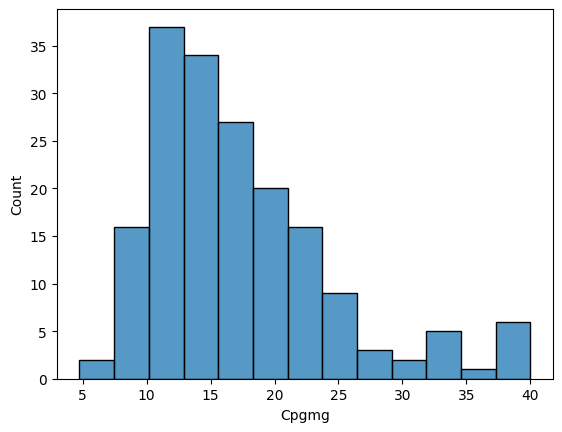

In [1664]:
sns.histplot(x='Cpgmg', data=data)

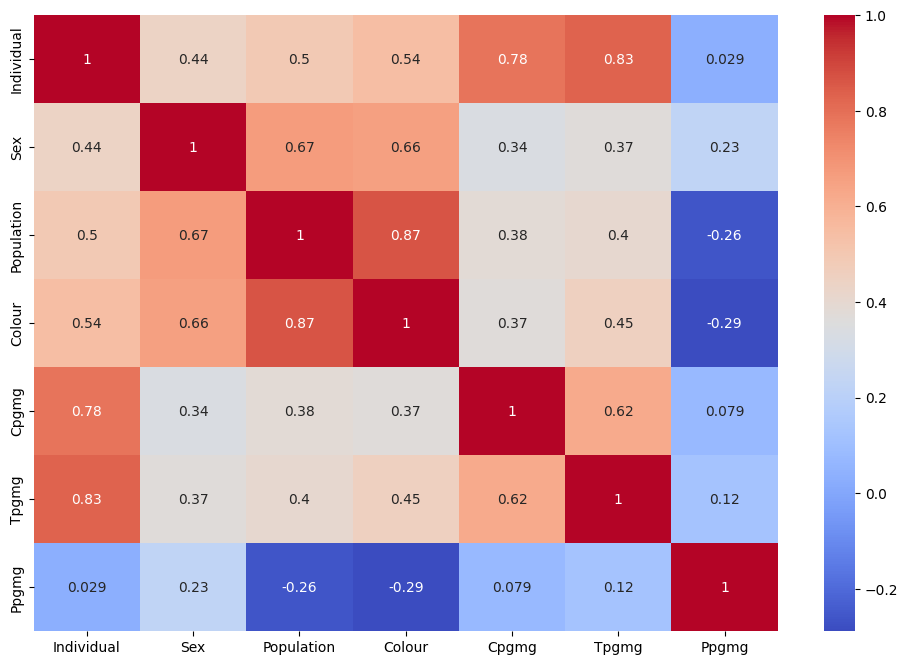

In [1665]:
# Visualize correlation matrix 
plt.figure(figsize = (12,8))
corr_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Prediction Models of Tpgmg

In [1666]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Sex"] = le.fit_transform(data["Sex"])
data["Colour"] = le.fit_transform(data["Colour"])

In [1667]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = data.drop('Tpgmg', axis=1)
y = data['Tpgmg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [1668]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [1669]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of your model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2)
print('MSE:', mse)

R2 score: 0.09229593833296634
MSE: 7.865394371354267


The R2 score for the model is 0.09229593833296634, which means that the model can only explain 9.23% of the variance in the dependent variable. This score suggests that the model does not fit the data well.

In [1670]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create a Random Forest Regressor model
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_forest.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model_forest.predict(X_test)

# Evaluate the performance of your model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2)
print('MSE:', mse)

R2 score: 0.08191829790780747
MSE: 7.955318211111112


With the assumption that there is a small proportion of the variance in the dependent variable, Let us go with the LinearRegression

## Predicting the level of progesterone hormone among the wolves in the sheet labelled "Test_Data2"

In [1671]:
# load Test_Data2
Test_Data2 = pd.read_excel("Wolf_Hormones.xlsx",  sheet_name='Test_Data2')


In [1672]:
# Drop last 2 rows
# by selecting all rows except last 2 rows
N = 2
Test_Data2 = Test_Data2.iloc[:-N , :]
Test_Data2.tail(2)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg,Ppgmg
10,207,F,1.0,W,10.16,1.80,NaN
11,208,F,2.0,W,24.38,5.49,NaN


In [1673]:
Test_Data2["Sex"] = le.fit_transform(Test_Data2["Sex"])
Test_Data2["Colour"] = le.fit_transform(Test_Data2["Colour"])

In [1674]:
Test_Data2 = Test_Data2.drop(['Tpgmg'], axis=1)

In [1675]:
Test_Data2['Ppgmg'] = Test_Data2['Ppgmg'].fillna(0)

In [1676]:
# make predictions using trained model
new_data_predictions = model.predict(Test_Data2)

# print predictions
print(new_data_predictions)

[5.67958288 4.81726308 2.68540913 2.56741637 7.50391872 3.96644727
 3.39191528 4.76882028 4.44919816 5.09863955 2.83066401 6.23342137]


# Linear Regression with Predicting Ppgmg

In [1677]:
X = data.drop('Ppgmg', axis=1)
y = data['Ppgmg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [1678]:
# Create a Linear Regression model
LinearModel = LinearRegression()

# Train the model using the training data
LinearModel.fit(X_train, y_train)

LinearRegression()

In [1679]:
# Make predictions using the testing data
y_pred = LinearModel.predict(X_test)

# Evaluate the performance of your model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 score:', r2)
print('MSE:', mse)

R2 score: 0.043791116196159274
MSE: 17.202999424443206


## Predicting the level of testosterone hormone among the wolves in the sheet labelled "Test_Data1"

In [1680]:
# load Test_Data1
Test_Data1 = pd.read_excel("Wolf_Hormones.xlsx",  sheet_name='Test_Data1')

In [1681]:
# Drop last 2 rows
# by selecting all rows except last 2 rows
N = 2
Test_Data1 = Test_Data1.iloc[:-N , :]
Test_Data1.tail(2)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg
16,195,F,1.0,D,19.57,NaN
17,196,F,1.0,W,12.55,NaN


In [1682]:
Test_Data1["Sex"] = le.fit_transform(Test_Data1["Sex"])
Test_Data1["Colour"] = le.fit_transform(Test_Data1["Colour"])

In [1683]:
Test_Data1['Tpgmg'] = Test_Data1['Tpgmg'].fillna(0)

In [1684]:
# make predictions using trained model
Test_Data1_predictions = LinearModel.predict(Test_Data1)

# print predictions
print(Test_Data1_predictions)

[24.83635802 21.46263531 24.760653   21.8833756  23.25287399 24.47408678
 25.35154534 25.15788064 28.80254696 24.98379185 28.41521756 26.97059882
 25.3179194  22.11704807 20.36778434 22.76480715 21.21238091 22.57431524]
